# Gradient Boosting

In [3]:
# Bloc non affiché

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score,r2_score, matthews_corrcoef, make_scorer


from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import datasets, ensemble

import imblearn


def result_model(model,X,Y) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
#     score = cross_val_score(model,X,Y,cv=5,scoring = make_scorer(f1_score))
#     print('F1 cross validé :', np.mean(score))
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True)
    plt.title(str(model))
    plt.show()
    
    # return()

## Téléchargement des données

In [4]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v1.csv")

## Pre-processing

On sépare dans un premier temps les variables explicatives et la variable à expliquer.

In [5]:
# Décomposition features / target
X = train.drop(columns='Response')
Y = train['Response']

Ensuite, on décompose en bdd train et test puis on scale les données grâce à sklearn.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index, columns=X.columns)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index, columns=X.columns)

## Modèle

In [7]:
gbr = ensemble.GradientBoostingClassifier()

On visualise les paramètres

In [8]:
gbr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Nous modifions quelques paramètres pour expliquer montrer l'implémentation mais le véritable tuning est réalisé dans la partie suivante : XGBoost.
Ici nous reprenons les paramètres trouvés pour l'XGBoost.

In [9]:
params = {
    "loss": "deviance",
    "learning_rate": 0.1,
    "n_estimators": 600,
    "max_depth": 4,
    "min_samples_split": 5,
}

Nous entrainons le modèle.

In [10]:
gbr = ensemble.GradientBoostingClassifier(**params)
gbr.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=5, n_estimators=600)

Nous visualisons les résultats.

Le f1 score vaut 0.3896830329397141


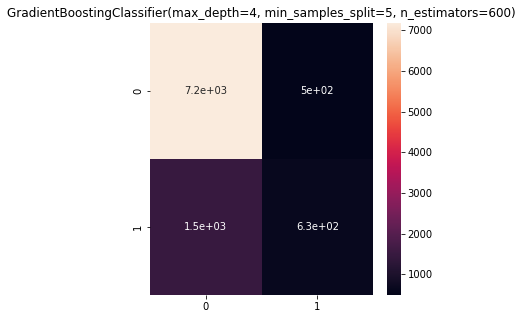

In [11]:
result_model(gbr, X_test, Y_test)

## Conclusion

Le modèle **Gradient boosting** améliore nos précédents résultats. XGBoost possède de nombreux points communs et à pour réputation d'être souvent plus performant. Ainsi, nous ne poussons pas plus ce modèle et testons directement le modèle **XGBoost**.

<br><br><br><br>